In [101]:
%matplotlib inline  
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
import config
from myfunc import timer
from myfunc import DirMan
import matplotlib
import geopandas as gpd
from pylab import rcParams
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera11/zhwei/students/Xionghui/data/run/{resolution}/'
post_data_path = '/tera11/zhwei/students/Xionghui/data/'
shp_path = '/tera11/zhwei/students/Xionghui/data/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

df = pd.read_csv(f'{data_path}csv/Global.csv')
shp = gpd.read_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')

In [102]:
import random

df2 = df.copy()

df2['Continent_Together'] = df2['Continent'].replace(to_replace=['South America','North America'], value=['South \nAmerica','North \nAmerica']) 

df3 = pd.DataFrame()
df3['Continent_area'] = df2.groupby('Continent_Together')['Area'].sum().div(1e9)
df3 = df3[df3['Continent_area'] > 300]
df3 = df3.sort_values(by=['Continent_area'], ascending=False).reset_index(drop=False)
# print(df3)

list1 = df3.loc[:,'Continent_Together']
list2 = df3.loc[:,'Continent_area']
mapping = dict(zip(list1, list2))

df2 = df2[df2.Continent_Together.isin(list1)]
df2 = df2[df2['Continent_Together'].notna()]
df2['Continent_area'] = df2['Continent_Together'].map(mapping)
df2 = df2.sort_values(by=['Continent_area'], ascending=False).reset_index(drop=True)
order = df2['Continent_Together'].unique()
df2['Continent_Together'] = pd.Categorical(df2['Continent_Together'], categories=order, ordered=True)
# print(df2)

categories = df2['Continent_Together'].unique()
# values = [df2[df2['Continent_Together'] == cat]['Sbedrock'].values for cat in categories]
grouped = df2.groupby('Continent_Together')
# values = pd.concat([group.sample(min(10000, len(group))) for name, group in categories])
values = [group.sample(min(10000, len(group)))['Sbedrock'].values for name, group in grouped]
print(values)
del df2, df3, mapping, list1, list2


/tmp/ipykernel_932959/3446222075.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby('Continent_Together')


[array([12.804936, 11.450333, 57.16127 , ..., 22.475744, 77.416664,
       54.51354 ]), array([292.81644, 167.86528, 312.00165, ..., 153.9301 , 141.25728,
        73.4196 ]), array([218.61647, 310.6549 , 329.29706, ..., 270.3877 , 272.38297,
       249.84523]), array([ 39.094864,  50.945812, 243.11035 , ...,  51.353645,  12.418795,
        56.34278 ]), array([ 66.45113  ,  60.962616 ,   7.4126253, ...,   1.7778975,
       205.91415  , 171.8331   ]), array([ 97.307236 ,  59.719044 ,   3.1687365, ...,  52.30399  ,
       176.02017  ,  56.48891  ])]


In [103]:
df2 = df.copy()

list1 = ['South America','Australia and New Zealand','Southern Africa','Eastern Africa' ,'Melanesia', 
        'Western Europe', 'Polynesia', 'Middle Africa','South-Eastern Asia', 'Western Africa', 
        'Southern Asia', 'Central America','Northern Africa', 'Caribbean', 'Western Asia', 
        'Eastern Asia','Northern America', 'Southern Europe', 'Central Asia', 'Eastern Europe',
        'Northern Europe']
list2 = ['South \nAmerica','Australia and \nNew Zealand','Southern \nAfrica','Eastern \nAfrica' ,'Melanesia', 
        'Western \nEurope', 'Polynesia', 'Middle \nAfrica','South-Eastern \nAsia', 'Western \nAfrica', 
        'Southern \nAsia', 'Central \nAmerica','Northern \nAfrica', 'Caribbean', 'Western \nAsia', 
        'Eastern \nAsia','Northern \nAmerica', 'Southern \nEurope', 'Central \nAsia', 'Eastern \nEurope',
        'Northern \nEurope']
mapping = dict(zip(list1, list2))
df2['Subregion_Together'] = df2['Subregion'].map(mapping).fillna(df2['Subregion'])

df3 = pd.DataFrame()
df3['Subregion_area'] = df2.groupby('Subregion_Together')['Area'].sum().div(1e9)
df3 = df3[df3['Subregion_area'] > 300]
df3 = df3.sort_values(by=['Subregion_area'], ascending=False).reset_index(drop=False)
# print(df3)

list1 = df3.loc[:,'Subregion_Together']
list2 = df3.loc[:,'Subregion_area']
mapping = dict(zip(list1, list2))

df2 = df2[df2.Subregion_Together.isin(list1)]
df2 = df2[df2['Subregion_Together'].notna()]
df2['Subregion_area'] = df2['Subregion_Together'].map(mapping)
df2 = df2.sort_values(by=['Subregion_area'], ascending=False).reset_index(drop=True)
order = df2['Subregion_Together'].unique()
df2['Subregion_Together'] = pd.Categorical(df2['Subregion_Together'], categories=order, ordered=True)
# print(df2)

categories2 = df2['Subregion_Together'].unique()
# values2 = [df2[df2['Subregion_Together'] == cat]['Sbedrock'].values for cat in categories2]
grouped = df2.groupby('Subregion_Together')
# values2 = pd.concat([group.sample(min(100000, len(group))) for name, group in categories2])
values2 = [group.sample(min(10000, len(group)))['Sbedrock'].values for name, group in grouped]
print(values2)
del df2, df3, mapping, list1, list2

/tmp/ipykernel_932959/1150758819.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby('Subregion_Together')


[array([180.83865 ,  15.965593, 379.61197 , ...,  58.477543, 201.07466 ,
        99.63414 ]), array([41.042698 , 60.532948 ,  1.9669843, ..., 52.0987   , 32.36955  ,
       27.237093 ]), array([ 97.42109 , 201.27032 , 177.6231  , ...,   8.389891, 193.2276  ,
        70.39863 ]), array([108.406685,  54.743156, 189.28328 , ...,  20.263693,  34.356636,
        79.00462 ]), array([ 38.119774,  65.92765 , 207.31894 , ...,  46.75493 ,  71.832886,
       176.58508 ]), array([278.4403 ,  23.23047, 155.64172, ..., 306.2439 ,  13.0372 ,
       378.48465]), array([272.582  , 365.2917 , 285.59625, ..., 338.08133, 134.00766,
       182.08018]), array([ 23.425224 , 143.81903  , 359.94266  , ..., 153.93295  ,
         5.9277425, 269.2625   ]), array([206.41054 ,  37.169563, 148.86057 , ..., 314.62857 , 151.44598 ,
       440.7696  ]), array([153.24416, 114.07896, 194.61366, ..., 246.41327, 121.55284,
       113.2361 ]), array([ 64.57501 , 326.7723  ,   4.981781, ..., 301.83987 , 241.23058 ,
       12

In [104]:
df2 = df.copy()

list1 = ['United States of America','Democratic Republic of the Congo','Central African Republic']
list2 = ['America','Congo*','Central \nAfrican*']
mapping = dict(zip(list1, list2))
df2['Sovereignt_Together'] = df2['Sovereignt'].map(mapping).fillna(df2['Sovereignt'])

df3 = pd.DataFrame()
df3['Sovereignt_area'] = df2.groupby('Sovereignt_Together')['Area'].sum().div(1e9)
df3 = df3[df3['Sovereignt_area'] > 300]
df3 = df3.sort_values(by=['Sovereignt_area'], ascending=False).reset_index(drop=False)
# print(df3)

list1 = df3.loc[:,'Sovereignt_Together']
list2 = df3.loc[:,'Sovereignt_area']
mapping = dict(zip(list1, list2))

df2 = df2[df2.Sovereignt_Together.isin(list1)]
df2 = df2[df2['Sovereignt_Together'].notna()]
df2['Sovereignt_area'] = df2['Sovereignt_Together'].map(mapping)
df2 = df2.sort_values(by=['Sovereignt_area'], ascending=False).reset_index(drop=True)
order = df2['Sovereignt_Together'].unique()
df2['Sovereignt_Together'] = pd.Categorical(df2['Sovereignt_Together'], categories=order, ordered=True)
# print(df2)

categories3= df2['Sovereignt_Together'].unique()
# values3 = [df2[df2['Sovereignt_Together'] == cat]['Sbedrock'].values for cat in categories3]
grouped = df2.groupby('Sovereignt_Together')
# values3 = pd.concat([group.sample(min(100000, len(group))) for name, group in categories])
values3 = [group.sample(min(10000, len(group)))['Sbedrock'].values for name, group in grouped]
print(values3)
del df2, df3, mapping, list1, list2

/tmp/ipykernel_932959/199896187.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby('Sovereignt_Together')


[array([35.983997 , 58.988968 , 41.644848 , ..., 76.82115  ,  1.2171663,
        6.4080577]), array([ 59.023293, 356.99667 , 294.00623 , ..., 266.05624 , 158.1922  ,
       191.64227 ]), array([ 16.317762, 180.99869 ,  58.959774, ..., 272.8545  ,   8.88125 ,
        19.127106]), array([  4.5810013,  35.97778  , 140.95265  , ...,  42.915524 ,
       288.44254  , 193.07886  ]), array([107.89415 , 256.93442 , 164.0424  , ...,  91.48197 , 169.78558 ,
        39.043224]), array([ 19.443129, 166.599   , 176.59566 , ...,  80.33777 , 205.87332 ,
       126.50551 ]), array([138.82788, 240.63272, 128.0775 , ...,  57.59818, 285.54758,
       334.84213]), array([ 78.4992  ,  11.829617,  31.050543, ...,  15.024921, 136.15054 ,
        31.569649]), array([237.03416 , 221.69473 , 379.9824  , ..., 340.85556 , 214.70026 ,
        10.761912]), array([237.43968, 207.45879, 172.12988, ..., 215.77097, 176.4771 ,
       111.4757 ]), array([313.6953 , 219.39622,  91.09589, ..., 245.42572, 330.93118,
        

In [105]:
df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Continent')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Continent')['Sbedrock'].mean()
# df1['Ssoil'] = df_area.groupby('Continent')['Ssoil'].mean()
df1['Area'] = df_area.groupby('Continent')['Area'].sum()

df1['Continent'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)

                       Sr    Sbedrock          Area      Continent
Continent                                                         
Asia           193.790012   90.453844  6.118740e+12           Asia
Africa         298.666314  190.386979  4.540072e+12         Africa
South America  320.085247  208.718369  3.675738e+12  South America
North America  210.625560  119.233203  2.786138e+12  North America
Europe         185.469256   74.560369  1.582207e+12         Europe
Oceania        197.693148  102.052837  1.208023e+12        Oceania
Antarctica      21.499716   11.866321  2.973036e+07     Antarctica


                       Sr    Sbedrock         Area      Continent
Continent                                                        
Asia           193.790012   90.453844  6118.739677           Asia
Africa         298.666314  190.386979  4540.071771         Africa
South America  320.085247  208.718369  3675.738265  South America
North America  210.625560  119.233203  2786.137696  North America
Europe         185.469256   74.560369  1582.206816         Europe
Oceania        197.693148  102.052837  1208.022726        Oceania
                                   Sr    Sbedrock         Area  \
Subregion                                                        
South America              319.390595  208.170724  3617.471891   
Eastern Europe             147.431458   40.035177  3109.308880   
Middle Africa              281.110265  168.326445  2265.934442   
Northern America           178.964416   90.491238  1934.032198   
Eastern Asia               168.373503   70.068709  1456.304144   
South-East

/tmp/ipykernel_932959/4292153090.py:284: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # 调整布局


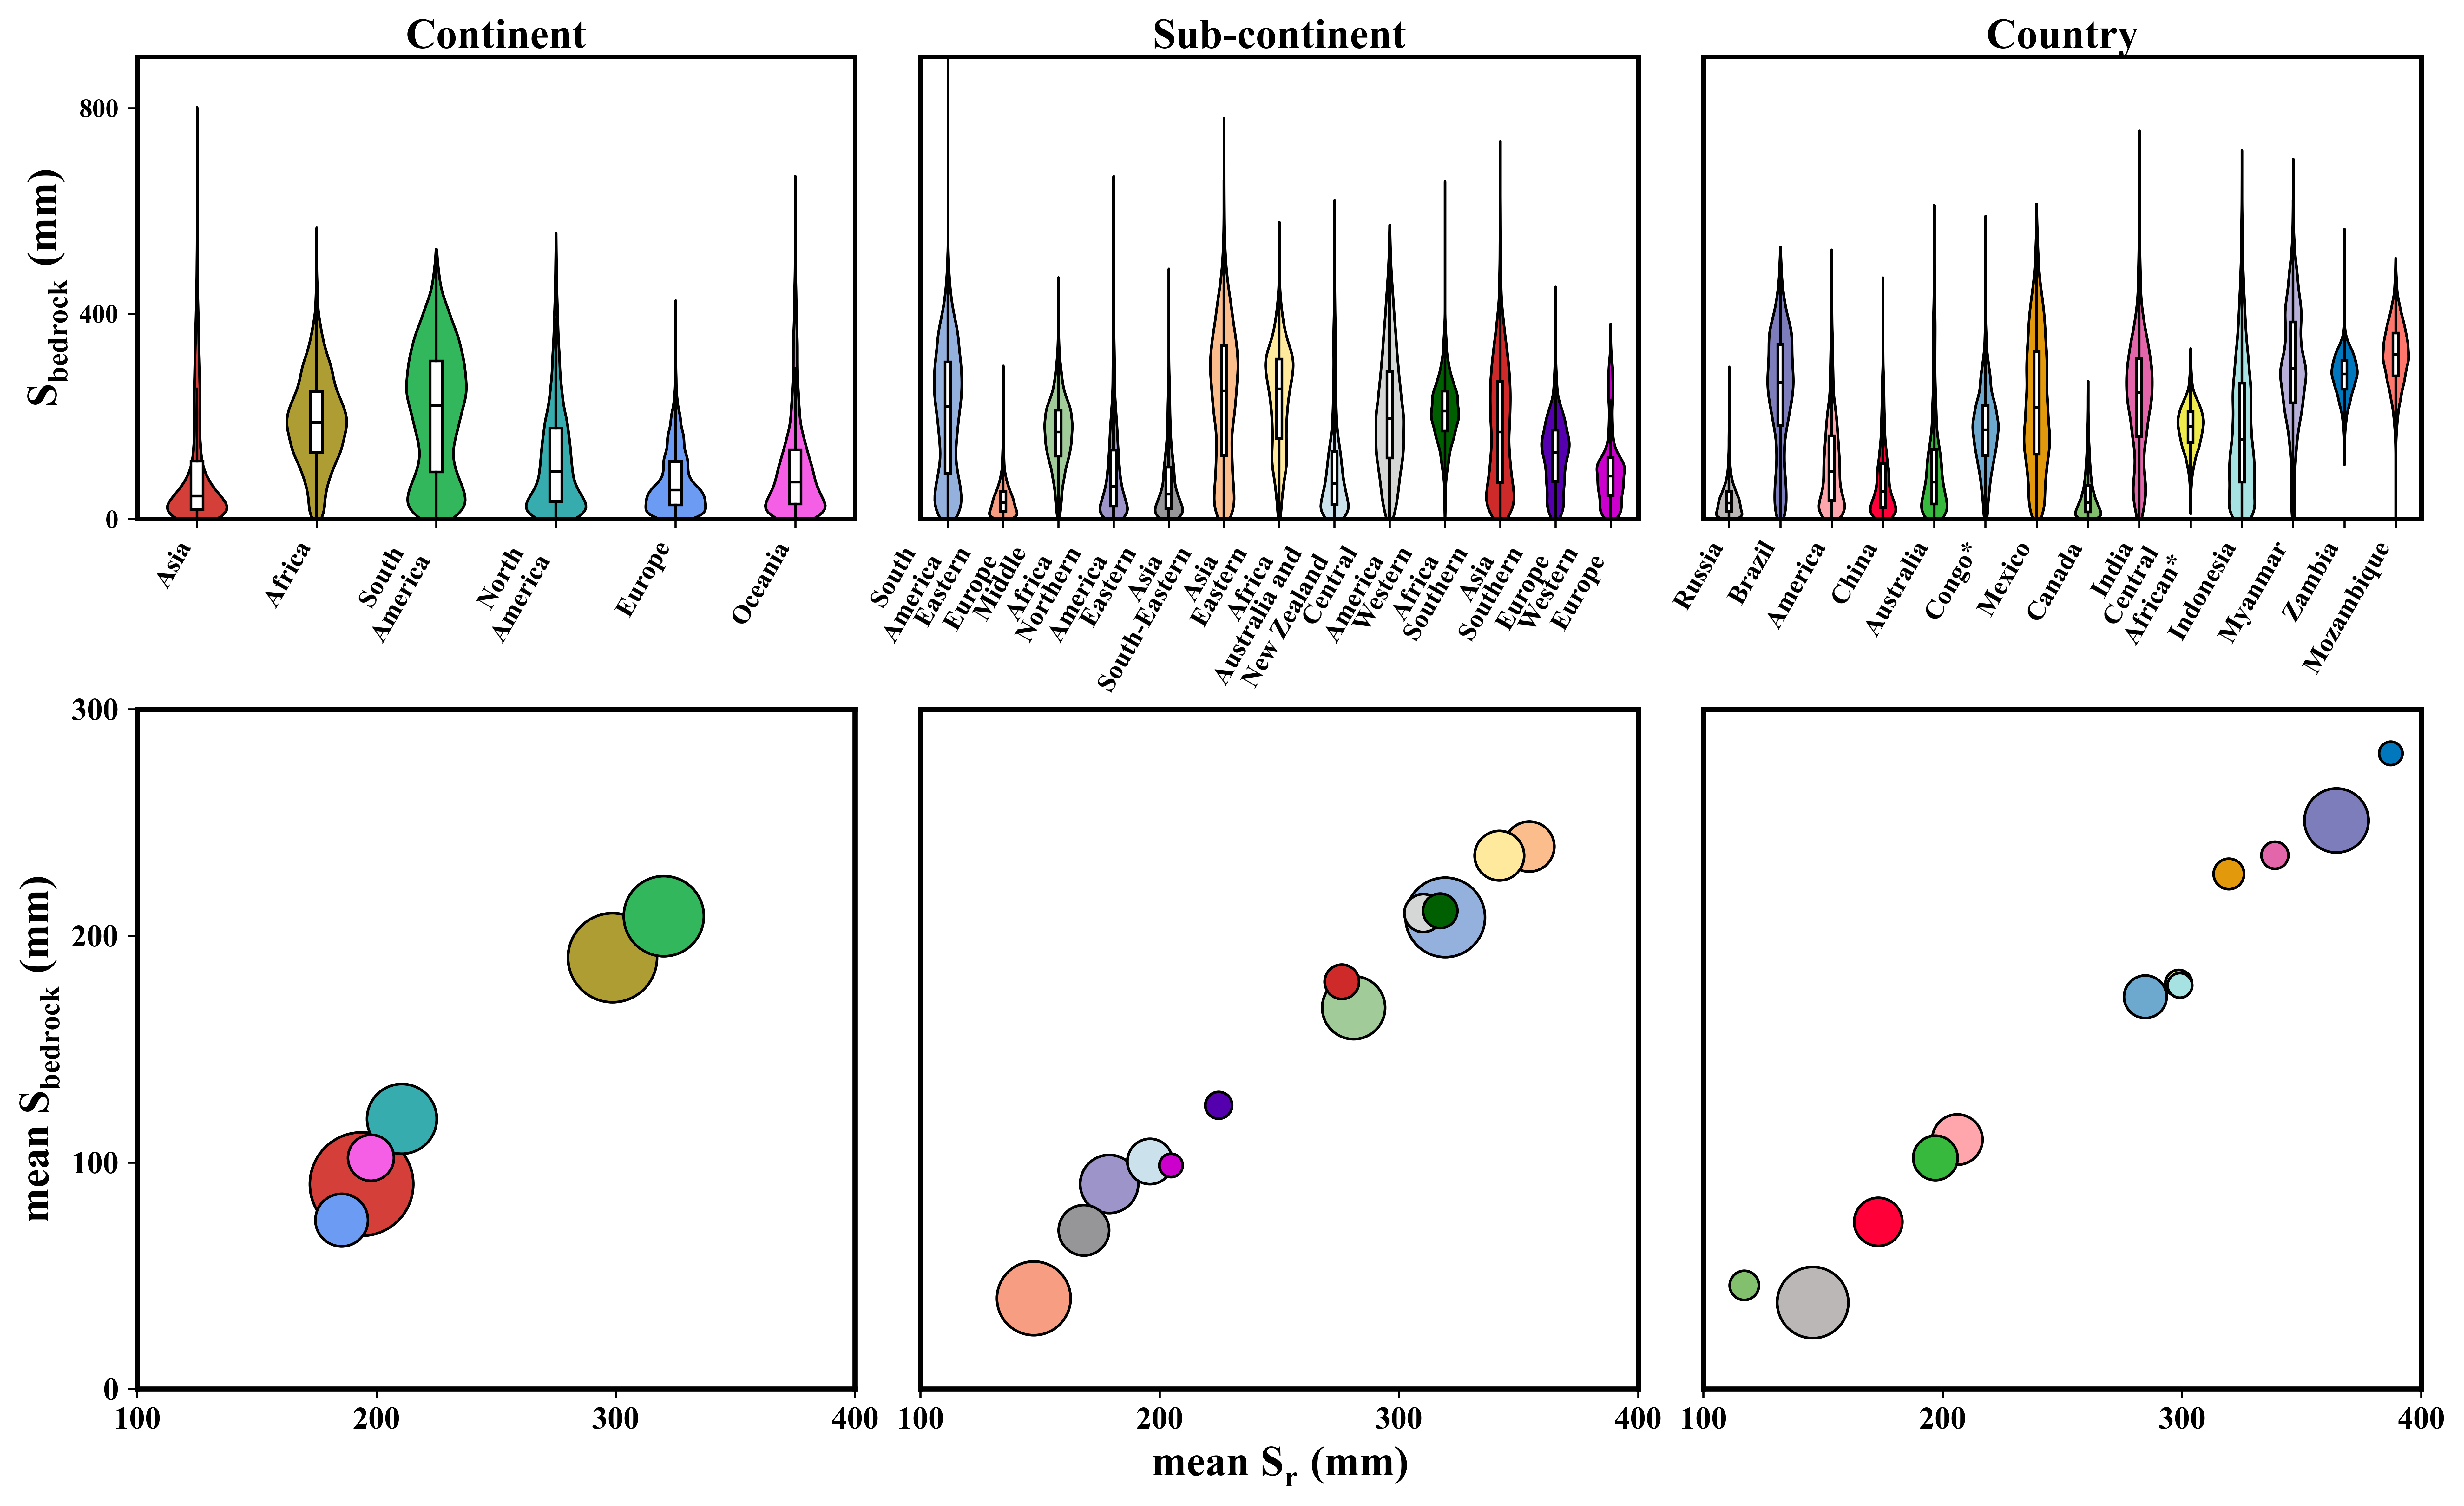

In [107]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=600) 
fig.subplots_adjust(left=0, right=1, 
                bottom=0, top=1,  hspace=7) 
gs = GridSpec(7, 6, figure=fig)

ax.set_axis_off()

# ax1 = fig.add_subplot(gs[0:2, 0])
# ax2 = fig.add_subplot(gs[2:4, 0])
# ax3 = fig.add_subplot(gs[4:6, 0])

# ax4 = fig.add_subplot(gs[0:2, 1:3])
# ax5 = fig.add_subplot(gs[2:4, 1:3])
# ax6 = fig.add_subplot(gs[4:6, 1:3])
ax1 = fig.add_subplot(gs[0:3, 0:2])
ax2 = fig.add_subplot(gs[0:3, 2:4])
ax3 = fig.add_subplot(gs[0:3, 4:6])

ax4 = fig.add_subplot(gs[3:7, 0:2])
ax5 = fig.add_subplot(gs[3:7, 2:4])
ax6 = fig.add_subplot(gs[3:7, 4:6])



colors = ['#D43F3A', '#ae9d32', '#32b75c', '#36acae', '#6c9bf4', '#f55fe5']
# colors = ['#f8de85', '#FAC13E','#a5537f','#a52653',
#                '#c04a02','#A4B381','#52B33F','#74B3B8',
#                '#B183B8','#7846A8']
# 3. 绘制小提琴图
violin_parts = ax1.violinplot(values, showmeans=False, showmedians=False, showextrema=False)
for i,pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])  # 设置填充颜色
    pc.set_edgecolor('black')    # 设置边框颜色
    pc.set_linewidth(1)        # 设置边框粗细
    pc.set_alpha(1)            # 设置透明度
# 4. 绘制箱型图
box_parts = ax1.boxplot(values, widths=0.1, patch_artist=True)
for box in box_parts['boxes']:
    box.set_facecolor('white')   # 设置箱体填充颜色
    box.set_edgecolor('black')   # 设置箱体边框颜色
    box.set_linewidth(1)       # 设置箱体线条粗细
for median in box_parts['medians']:
    median.set_color('black')    # 设置中线颜色
    median.set_linewidth(1)    # 设置中线粗细
for whisker in box_parts['whiskers']:
    whisker.set_color('black')   # 设置须线颜色
    whisker.set_linewidth(1)   # 设置须线粗细
for cap in box_parts['caps']:
    cap.set_color('black')       # 设置端点颜色
    cap.set_linewidth(0)       # 设置端点粗细
for flier in box_parts['fliers']:
    flier.set_marker('')         # 隐藏异常点
# 5. 设置样式
ax1.set_ylim(0, 900)  # 动态设置 y 轴范围
ax1.set_yticks(np.arange(0,1000,400))  
ax1.set_yticklabels(np.arange(0,1000,400), fontsize=12, fontweight='bold')

ax1.set_xticks(range(1, len(categories) + 1))  # 设置 x 轴刻度位置
ax1.set_xticklabels(categories, fontsize=15, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
ax1.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16, fontweight='bold')  # 设置 y 轴标签，使用 LaTeX 格式
ax1.set_title('Continent', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1.8)  
ax1.tick_params(axis='both', labelsize=10)  # 设置刻度标签大小




df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Continent')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Continent')['Sbedrock'].mean()
df1['Area'] = df_area.groupby('Continent')['Area'].sum()/(1e9)
df1 = df1[df1['Area']>300]
df1['Continent'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)
x = df1['Sr']
y = df1['Sbedrock']
size = df1['Area']/4
fill = df1['Area']
rgb_list = ['#D43F3A', '#ae9d32', '#32b75c', '#36acae', '#6c9bf4', '#f55fe5']
scatter = ax4.scatter(x, y, s=size, linewidths=1,
                    edgecolors="k", color=rgb_list)
for spine in ax4.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(2)  

ax4.set_xlim(100, 400)  
ax4.set_ylim(0, 300)  
# ax4.yaxis.tick_right()  
# ax4.yaxis.set_label_position("right")  
ax4.set_xticks(np.arange(100,500,100))
ax4.set_yticks(np.arange(0,400,100))
ax4.set_xticklabels(np.arange(100,500,100), fontsize=12, fontweight='bold')
ax4.set_yticklabels(np.arange(0,400,100), fontsize=12, fontweight='bold')
# ax4.set_xlabel('mean $S_{{r}}$ (mm)', fontsize=16, fontweight='bold')
ax4.set_ylabel('mean $S_{{bedrock}}$ (mm)', fontsize=16, fontweight='bold')
# ax4.set_title('Continent')





colors = ['#94b0dc', '#f79d82', '#a1cc9a', '#9d95c9', 
        '#969597', '#fbbd8c', '#fee99c', '#cbe2ed', 
        '#d5d6d6', '#005f00', '#cd2a29', '#5500ae', '#cc00cc']

# 3. 绘制小提琴图
violin_parts = ax2.violinplot(values2, showmeans=False, showmedians=False, showextrema=False)
for i,pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])  # 设置填充颜色
    pc.set_edgecolor('black')    # 设置边框颜色
    pc.set_linewidth(1)        # 设置边框粗细
    pc.set_alpha(1)            # 设置透明度
# 4. 绘制箱型图
box_parts = ax2.boxplot(values2, widths=0.1, patch_artist=True)
for box in box_parts['boxes']:
    box.set_facecolor('white')   # 设置箱体填充颜色
    box.set_edgecolor('black')   # 设置箱体边框颜色
    box.set_linewidth(1)       # 设置箱体线条粗细
for median in box_parts['medians']:
    median.set_color('black')    # 设置中线颜色
    median.set_linewidth(1)    # 设置中线粗细
for whisker in box_parts['whiskers']:
    whisker.set_color('black')   # 设置须线颜色
    whisker.set_linewidth(1)   # 设置须线粗细
for cap in box_parts['caps']:
    cap.set_color('black')       # 设置端点颜色
    cap.set_linewidth(0)       # 设置端点粗细
for flier in box_parts['fliers']:
    flier.set_marker('')         # 隐藏异常点
# 5. 设置样式
ax2.set_ylim(0, 900)  # 动态设置 y 轴范围
# ax2.set_yticks(np.arange(0,1000,200))  
ax2.set_yticks([])


ax2.set_xticks(range(1, len(categories2) + 1))  # 设置 x 轴刻度位置
ax2.set_xticklabels(categories2, fontsize=15, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
# ax2.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16)  # 设置 y 轴标签，使用 LaTeX 格式
ax2.set_title('Sub-continent', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
for spine in ax2.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1.8)  
ax2.tick_params(axis='both', labelsize=10)  # 设置刻度标签大小





df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Subregion')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Subregion')['Sbedrock'].mean()
df1['Area'] = df_area.groupby('Subregion')['Area'].sum()/(1e9)
df1 = df1[df1['Area']>300]
df1['Subregion'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)
x = df1['Sr']
y = df1['Sbedrock']
size = df1['Area']/4
fill = df1['Area']

rgb_list = ['#94b0dc', '#f79d82', '#a1cc9a', '#9d95c9', 
        '#969597', '#fbbd8c', '#fee99c', '#cbe2ed', 
        '#d5d6d6', '#005f00', '#cd2a29', '#5500ae', '#cc00cc']

scatter = ax5.scatter(x, y, s=size, linewidths=1,
                    edgecolors="k", color=rgb_list[:])

for spine in ax5.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(2)  

ax5.set_xlim(100, 400)  
ax5.set_ylim(0, 300)  
ax5.set_xticks(np.arange(100,500,100))
ax5.set_yticks([]) 
ax5.set_xticklabels(np.arange(100,500,100), fontsize=12, fontweight='bold')
ax5.set_xlabel('mean $S_{{r}}$ (mm)', fontsize=16, fontweight='bold')
# ax5.set_ylabel('mean $S_{{bedrock}}$ (mm)', fontsize=16, fontweight='bold')




colors = ['#bab7b6', '#7e7dbc', '#ffa5ab', '#ff0038', 
        '#37b93d', '#6da9cf', '#e2990b', '#82c06e', 
        '#e366ab', '#efeb4f', '#a7e2e2', '#b9b0d9',
        '#0178bd', '#ff776c', '#ffb36a', '#73cdc3']
# 3. 绘制小提琴图
violin_parts = ax3.violinplot(values3, showmeans=False, showmedians=False, showextrema=False)
for i,pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])  # 设置填充颜色
    pc.set_edgecolor('black')    # 设置边框颜色
    pc.set_linewidth(1)        # 设置边框粗细
    pc.set_alpha(1)            # 设置透明度
# 4. 绘制箱型图
box_parts = ax3.boxplot(values3, widths=0.1, patch_artist=True)
for box in box_parts['boxes']:
    box.set_facecolor('white')   # 设置箱体填充颜色
    box.set_edgecolor('black')   # 设置箱体边框颜色
    box.set_linewidth(1)       # 设置箱体线条粗细
for median in box_parts['medians']:
    median.set_color('black')    # 设置中线颜色
    median.set_linewidth(1)    # 设置中线粗细
for whisker in box_parts['whiskers']:
    whisker.set_color('black')   # 设置须线颜色
    whisker.set_linewidth(1)   # 设置须线粗细
for cap in box_parts['caps']:
    cap.set_color('black')       # 设置端点颜色
    cap.set_linewidth(0)       # 设置端点粗细
for flier in box_parts['fliers']:
    flier.set_marker('')         # 隐藏异常点
# 5. 设置样式
ax3.set_ylim(0, 900)  # 动态设置 y 轴范围
# ax3.set_yticks(np.arange(0,1000,200))  
ax3.set_yticks([])

ax3.set_xticks(range(1, len(categories3) + 1))  # 设置 x 轴刻度位置
ax3.set_xticklabels(categories3, fontsize=15, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
# ax3.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16)  # 设置 y 轴标签，使用 LaTeX 格式
ax3.set_title('Country', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
for spine in ax3.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1.8)  
ax3.tick_params(axis='both', labelsize=10)  # 设置刻度标签大小




df_area = df.copy()
df1 = pd.DataFrame()
df1['Sr'] = df_area.groupby('Sovereignt')['Sr'].mean()
df1['Sbedrock'] = df_area.groupby('Sovereignt')['Sbedrock'].mean()
df1['Area'] = df_area.groupby('Sovereignt')['Area'].sum()/(1e9)
df1 = df1[df1['Area']>300]
df1['Sovereignt'] = df1.index
df1 = df1.sort_values(by='Area', ascending=False)
print(df1)
x = df1['Sr']
y = df1['Sbedrock']
size = df1['Area']/4
fill = df1['Area']


rgb_list = ['#bab7b6', '#7e7dbc', '#ffa5ab', '#ff0038', 
        '#37b93d', '#6da9cf', '#e2990b', '#82c06e', 
        '#e366ab', '#efeb4f', '#a7e2e2', '#b9b0d9',
        '#0178bd', '#ff776c']
        # , '#ffb36a', '#73cdc3']
scatter = ax6.scatter(x, y, s=size, linewidths=1,
                    edgecolors="k", color=rgb_list[:])

for spine in ax6.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(2)  

ax6.set_xlim(100, 400)  
ax6.set_ylim(0, 300)  

ax6.yaxis.tick_right()  
ax6.yaxis.set_label_position("right")  
ax6.set_xticks(np.arange(100,500,100))
ax6.set_yticks([])  
ax6.set_xticklabels(np.arange(100,500,100), fontsize=12, fontweight='bold')
# ax6.set_xlabel('mean $S_{{r}}$ (mm)', fontsize=16, fontweight='bold')


# ax4.set_aspect('equal')
# ax5.set_aspect('equal')
# ax6.set_aspect('equal')


# ax1.set_position([0, 0, 1/3, 1])
# ax2.set_position([1/3, 0, 1/3, 1])
# ax3.set_position([2/3, 0, 1/3, 1])

# 6. 设置透明背景
fig.patch.set_alpha(0)  # 设置整个图表的背景透明
# 7. 显示图表
plt.tight_layout()  # 调整布局
plt.show()